In [1]:
import tensorflow as tf
import numpy as np

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLODA0D/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLODA0D/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [30]:
#Setup model
"""
## Conv2D(
    32. Number of convolved images that going to be created with 32 different filtters/kernels
    (3,3) Filtter size
    padding = same. Include a padding to downsampling. with same there is no padding
)
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [31]:
history=model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3849 - accuracy: 0.8603
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2483 - accuracy: 0.9092
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1985 - accuracy: 0.9257
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1652 - accuracy: 0.9391
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1406 - accuracy: 0.9482
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1191 - accuracy: 0.9560
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0971 - accuracy: 0.9635
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9704
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9744
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.057

In [32]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5272 - accuracy: 0.9186
Accuracy on test dataset: 0.9186000227928162


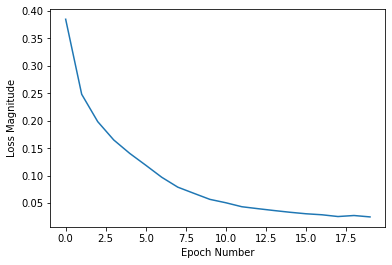

In [34]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])